# Telecom Churn Analysis 

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
customer churn is a critical metric because it is less expensive to retain existing customers than it is to acquire new customers.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

PROJECT OBJECTIVE:

To build a model that will help to identify the potential customers who 
have a higher probability to churn. This helps the company to understand the pinpoints and patterns 
of customer churn and will increase the focus on strategizing customer retention. 

STEPS AND TASKS:

    1. Data Understanding & Exploration
    2. Data Cleaning & Analysis
    3. Model building

### 1. Data Understanding & Exploration

In [1]:
# importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection  import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#Read data
churn1=pd.read_csv("TelcomCustomer-Churn_1.csv")
churn2=pd.read_csv("TelcomCustomer-Churn_2.csv")

In [3]:
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(churn1.shape)
print(churn2.shape)

(7043, 10)
(7043, 12)


In [6]:
#Merging both data
data=pd.merge(churn1,churn2,on="customerID",how="inner")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#To verify all the columns are incorporated in the dataframe,
print(churn1[~churn1['customerID'].isin(data['customerID'])])
print(churn2[~churn2['customerID'].isin(data['customerID'])])
print('')
print(data.shape)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity]
Index: []
Empty DataFrame
Columns: [customerID, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

(7043, 21)


In [8]:
#all are merged in data

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Data Cleaning & Analysis

In [10]:
#Impute missing/unexpected values in the DataFrame. 

In [11]:
print(data.isnull().sum())
print(data.info())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   obj

In [12]:
# The total charges column is showing object.
# checking if there is any white space in the column
totalchargespace = pd.DataFrame(data.TotalCharges.str.isspace())

#printing the columns which has white space.
data[totalchargespace['TotalCharges']==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
#Fill nan values in the blank
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

#checking if blank space is filled with nan.
data[totalchargespace['TotalCharges']==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
#  converting the TotalCharges column to float
data['TotalCharges']=data['TotalCharges'].astype('float64')

In [15]:
print(data.isnull().sum())
#Now its showing  11 null values in TotalCharges.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<AxesSubplot:ylabel='Density'>

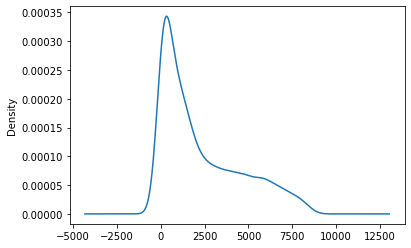

In [16]:
data['TotalCharges'].plot(kind="kde")

<AxesSubplot:xlabel='TotalCharges'>

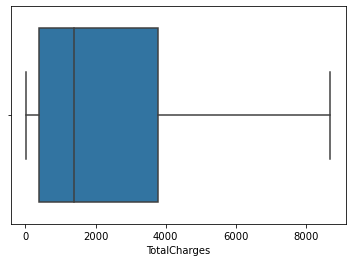

In [55]:
# to check the distribution and outliers
sb.boxplot(data=data,x='TotalCharges')

In [18]:
# since there are no outliers,we can go with mean imputation
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

<AxesSubplot:ylabel='Density'>

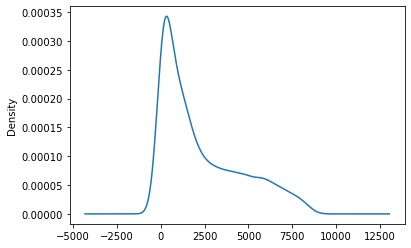

In [19]:
# Checking the distribution after imputation
data['TotalCharges'].plot(kind="kde")

In [20]:
#this is to make sure that there are no null values.
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [21]:
#to check if the mean is imputed
data.loc[936,'TotalCharges']

2283.3004408418656

In [22]:
#Make sure all the variables with continuous values are of ‘Float’ type
data['SeniorCitizen']=data['SeniorCitizen'].astype('float64')
data['tenure']=data['tenure'].astype('float64')
data['TotalCharges']=data['TotalCharges'].astype('float64')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
#numerical data
num_data=data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
num_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65


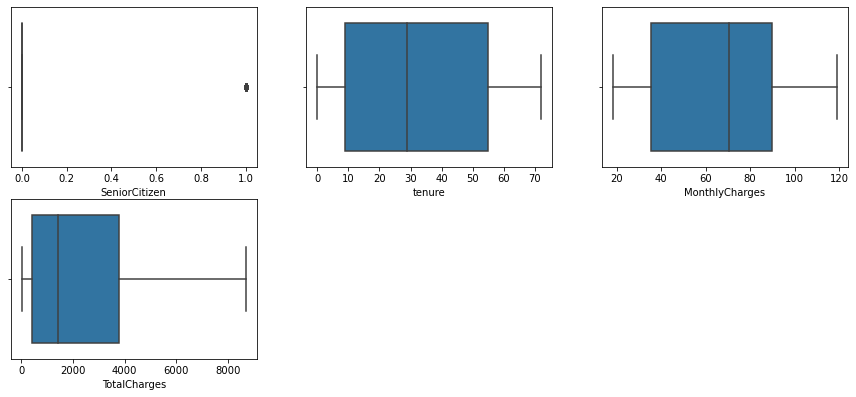

In [56]:
plt.figure(figsize=(15,10))
pos = 1
for i in num_data.columns:
    plt.subplot(3, 3, pos)
    sb.boxplot(data=num_data,x=i)
    pos += 1 

#### We can see that there are no outliers in the numerical data. Senior citizen column, only 2 values 0 and 1.



In [25]:
#all features with oblect type
cat_data=data.select_dtypes(include='object')
cat_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [26]:
# Categorical column excluding custome ID which is not relevent in analysis
cat_data1=cat_data.iloc[:,1:]
cat_data1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


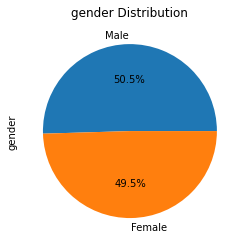

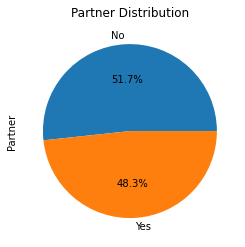

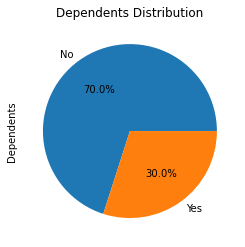

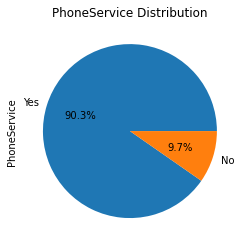

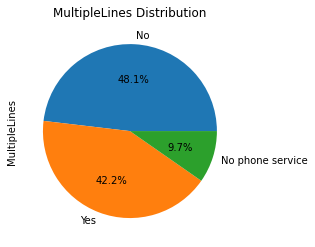

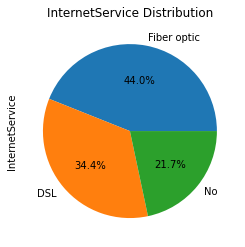

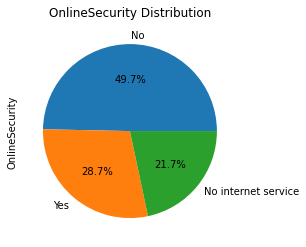

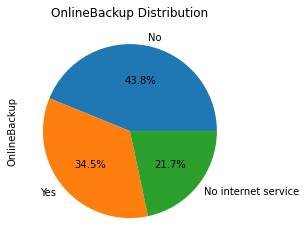

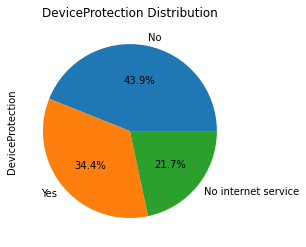

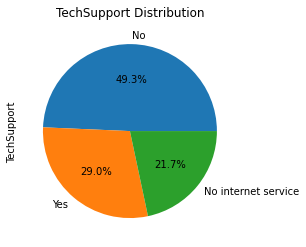

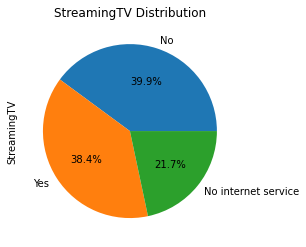

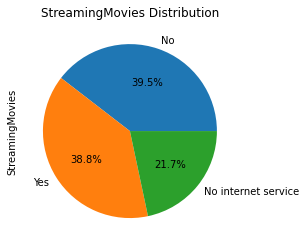

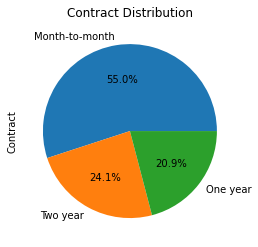

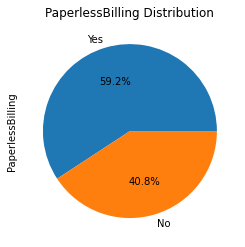

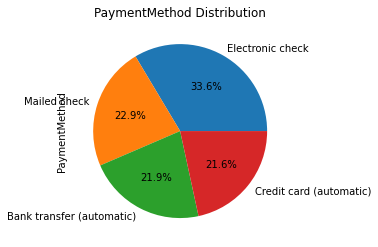

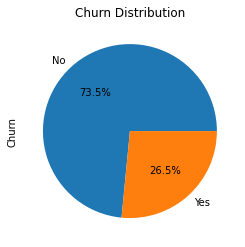

In [27]:
#pie-charts for all the appropriate Categorical features and showing the percentage of distribution for each class under each feature.
for item in cat_data1.columns:
    cat_data1[item].value_counts().plot.pie(autopct='%2.1f%%')
    plt.title("{} Distribution".format(item))
    plt.show()     

In [28]:
#From the above chart, we can say that,
# There is not much difference in gender, slightly more male users than female users.
#Only around half of the customers have a partner, and only about a third of the overall customers have dependents.
#Majority of users have phone service, more users for multiple lines.
#Around 22% of users don't have internet connection.
#Most of them have month to month contract,around 60% users do paperless billing.
# The churn rate is 26.6%.

In [29]:
#Encode all the appropriate Categorical features with the best suitable approach
# Machine learning algorithm need all data to be numeric. Here we can use one hot encoding to convert the categorical variale as there's less classes under each feature. 

In [30]:
cat_dummies = pd.get_dummies(cat_data1,drop_first= True)
cat_dummies.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [31]:
#preparing final data by combining the numerical data and the categorical data which are converted to numeric
final_data=pd.concat([num_data,cat_dummies],axis=1)
final_data.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.0,34.0,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

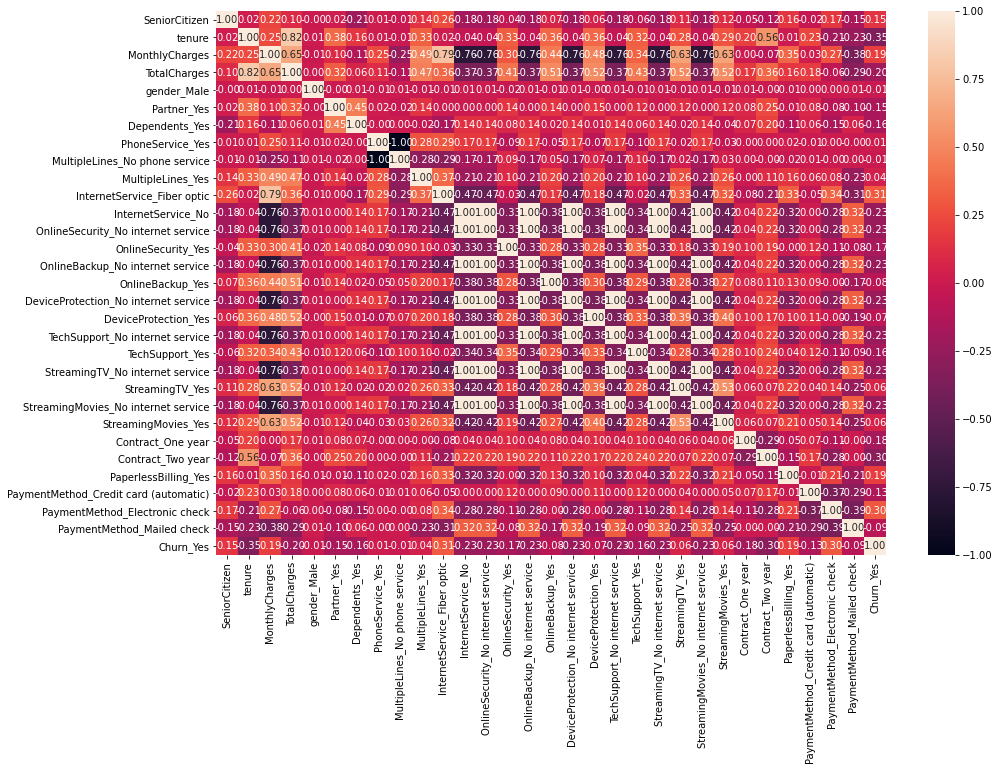

In [32]:
# Plotting heat map to identify correlation between variables
plt.figure(figsize=(15, 10))
sb.heatmap(final_data.corr(), annot=True,fmt=".2f")

In [33]:
#Here we can see that,Total day charge , internet service calls and Tech support variables are highly impacted on customer's decision on churn.

In [34]:
#Normalize/Standardize the data with the best suitable approach.
X=final_data.drop(['Churn_Yes'],axis=1)
y=final_data['Churn_Yes']

# Scaling all the variables to a range of 0 to 1.
#It is important to scale the variables. This helped to improve the accuracy of the model.

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [35]:
#Split the data into 80% train and 20% test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=1)

### 3. Model building and Improvement:

#### 1. Logistic Regression

In [36]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

#Initialise the model
lr_model = LogisticRegression(solver='liblinear')

#train the model
result = lr_model.fit(X_train, y_train) 
y_pred = lr_model.predict(X_test) 

lr_models_acc=metrics.accuracy_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(lr_models_acc)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-Score: ", f1)

0.8105039034776437
Recall:  0.5775862068965517
Precision:  0.6261682242990654
F1-Score:  0.600896860986547


AxesSubplot(0.125,0.125;0.775x0.755)


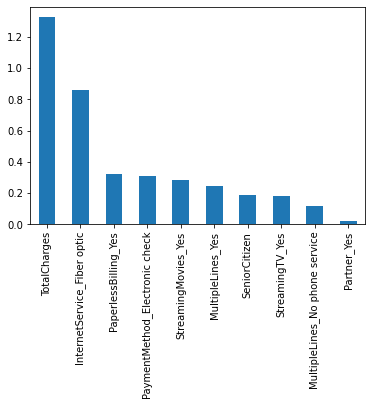

In [37]:
# To get the weights of all the variables
weights = pd.Series(lr_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


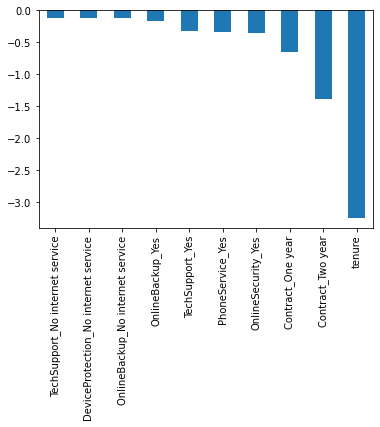

In [38]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

#We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation.
#Total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. 

#### 2. Decision Tree

In [39]:
#Building the decision tree model. 
d_tree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
d_tree.fit(X_train, y_train)#train the model

DecisionTreeClassifier(random_state=1)

In [40]:
y_pred = d_tree.predict(X_test)

dt_score=d_tree.score(X_train, y_train)
dt_models_acc=metrics.accuracy_score(y_test, y_pred)

recall=recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

#train acc
print("Train Accuracy: ",((dt_score)*100).round(2))

#test acc
print("Test Accuracy: ",((dt_models_acc)*100).round(2))

print("Recall: ", ((recall)*100).round(2))
print("Precision: ", ((precision)*100).round(2))
print("F1-Score: ", ((f1)*100).round(2))

Train Accuracy:  99.8
Test Accuracy:  73.74
Recall:  53.74
Precision:  47.22
F1-Score:  50.27


In [41]:
#From above, decision treee model gives good score on training, but less score on testing.
#Let's use regularisation technique to get more generalised model.

#### Decision Tree(Regularisation)

In [42]:
d_tree_reg = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)

d_tree_reg.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [43]:
y_pred = d_tree_reg.predict(X_test)

dt_score_reg=d_tree_reg.score(X_train, y_train)
dt_models_acc_reg=metrics.accuracy_score(y_test, y_pred)

recall=recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

#train acc
print("Train Accuracy: ",(dt_score_reg*100).round(2))

#test acc
print("Test Accuracy: ",(dt_models_acc_reg*100).round(2))

print("Recall: ", (recall*100).round(2))
print("Precision: ", ((precision)*100).round(2))
print("F1-Score: ", ((f1)*100).round(2))

Train Accuracy:  78.79
Test Accuracy:  80.13
Recall:  41.67
Precision:  65.32
F1-Score:  50.88


<AxesSubplot:>

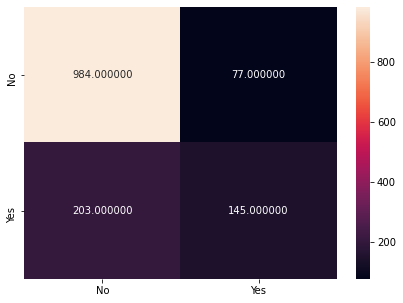

In [44]:
#Confusion matrix
y_predict = d_tree_reg.predict(X_test)

c_mat=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_c_mat = pd.DataFrame(c_mat, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sb.heatmap(df_c_mat, annot=True ,fmt='f')

[Text(0.5, 0.875, 'x[1] <= 0.243\ngini = 0.394\nsamples = 5634\nvalue = [4113, 1521]'),
 Text(0.25, 0.625, 'x[10] <= 0.5\ngini = 0.496\nsamples = 2122\nvalue = [1156, 966]'),
 Text(0.125, 0.375, 'x[1] <= 0.076\ngini = 0.41\nsamples = 1216\nvalue = [866, 350]'),
 Text(0.0625, 0.125, 'gini = 0.48\nsamples = 644\nvalue = [386, 258]'),
 Text(0.1875, 0.125, 'gini = 0.27\nsamples = 572\nvalue = [480, 92]'),
 Text(0.375, 0.375, 'x[3] <= 0.012\ngini = 0.435\nsamples = 906\nvalue = [290, 616]'),
 Text(0.3125, 0.125, 'gini = 0.235\nsamples = 191\nvalue = [26, 165]'),
 Text(0.4375, 0.125, 'gini = 0.466\nsamples = 715\nvalue = [264, 451]'),
 Text(0.75, 0.625, 'x[10] <= 0.5\ngini = 0.266\nsamples = 3512\nvalue = [2957, 555]'),
 Text(0.625, 0.375, 'x[25] <= 0.5\ngini = 0.113\nsamples = 1939\nvalue = [1822, 117]'),
 Text(0.5625, 0.125, 'gini = 0.187\nsamples = 1005\nvalue = [900, 105]'),
 Text(0.6875, 0.125, 'gini = 0.025\nsamples = 934\nvalue = [922, 12]'),
 Text(0.875, 0.375, 'x[1] <= 0.701\ngini =

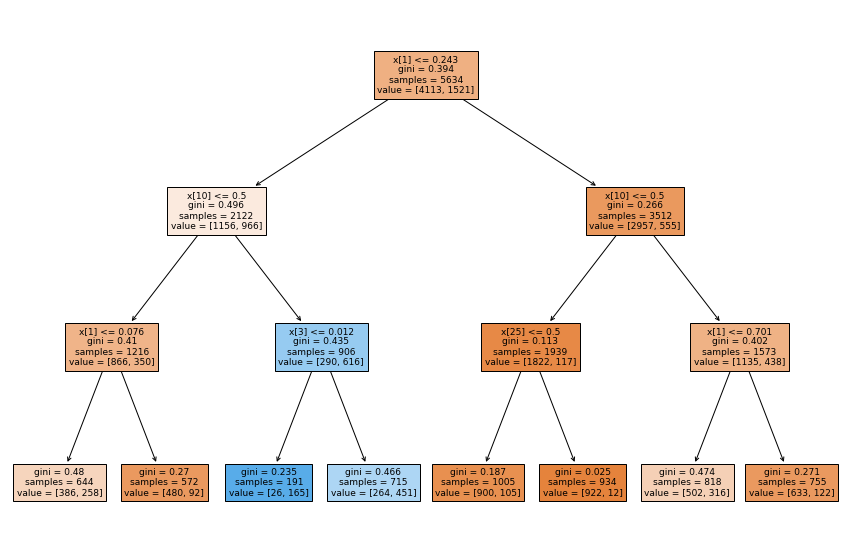

In [45]:
plt.figure(figsize=(15,10))
tree.plot_tree(d_tree_reg,filled=True)

#### 3. Random Forest

In [59]:
# we can give some parameters like no.of trees, no.of features, leaf node etc.
rf_model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
rf_model.fit(X_train, y_train)

# Make predictions
prediction_test = rf_model.predict(X_test)
rf_acc=metrics.accuracy_score(y_test, prediction_test)
rf_acc

0.8097941802696949

<AxesSubplot:>

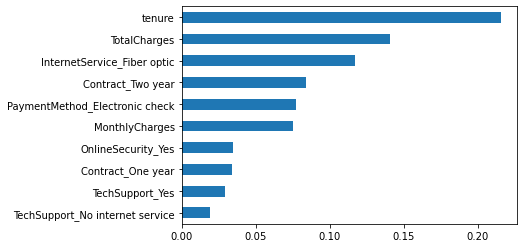

In [47]:
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [48]:
#Tenure and total charges are the most important predictor variables to predict churn.

#### 4. Ada Boost

In [49]:
ad_model = AdaBoostClassifier()
ad_model.fit(X_train,y_train)
preds = ad_model.predict(X_test)
ad_acc=metrics.accuracy_score(y_test, preds)
ad_acc

0.8140525195173882

#### 5. XGBoost

In [50]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
preds = xg_model.predict(X_test)
xg_acc=metrics.accuracy_score(y_test, preds)
xg_acc

0.794889992902768

# Result

In [58]:
result=pd.DataFrame({'Models':['Logistic Regression','Decision Tree(Regularisation)','Random Forest','AdaBoost','XGBoost'],
             'Accuracy':[lr_models_acc,dt_models_acc_reg,rf_acc,ad_acc,xg_acc]})
result

,Models,Accuracy
0,Logistic Regression,0.810504
1,Decision Tree(Regularisation),0.801278
2,Random Forest,0.809794
3,AdaBoost,0.814053
4,XGBoost,0.794890


In [ ]:
# We can say that Logistic Regression and AdaBoost work better than other models, there's only slight differences in accuracy between models.

#### From the above practice, Multiple factors influence customer's dissatisfaction, including quality of service and network quality.
#### Customers having numerous issues with phone services and  online services, will be more likely to seek better alternatives. 
#### An expensive tariff plan results in a high fixed cost for the customer. When the needs of a customer do not correspond to the       chosen tariff plan, we say that the customer is wrongly positioned.
#### A wrong positioning results in most cases to a higher bill than expected, and is a significant cause of churn.